In [38]:
# !pip3 install basemap
!pip3 install basemap-data-hires

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91.1 MB 1.1 MB/s 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


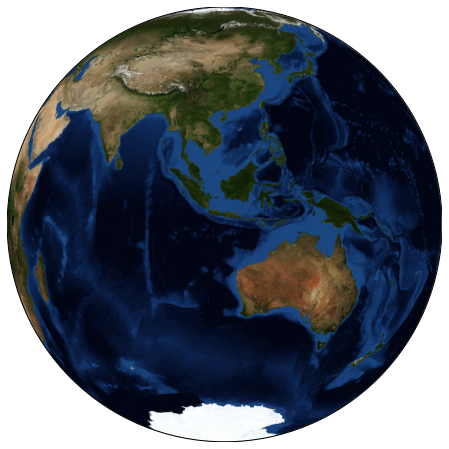

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=-10, lon_0=110)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(4714384.607664193, 2887776.2065762063, ' Little Rock')

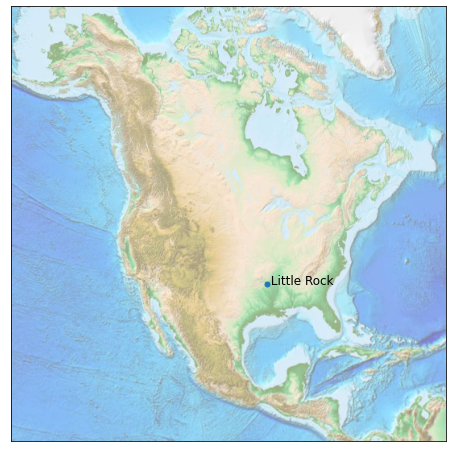

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8e6, lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)
x, y = m(-92.2880, 34.7445)
plt.plot(x, y, 'o', markersize=5)
plt.text(x, y, ' Little Rock', fontsize=12)

In [12]:
from itertools import chain

def draw_map(m, scale=0.2):
  m.shadedrelief(scale=scale)
  lats = m.drawparallels(np.linspace(-90, 90, 13))
  lons = m.drawmeridians(np.linspace(-180, 180, 13))

  lat_lines = chain(*(tup[1][0] for tup in lats.items()))
  lon_lines = chain(*(tup[1][0] for tup in lons.items()))
  all_lines = chain(lat_lines, lon_lines)

  for line in all_lines:
    line.set(linestyle='-', alpha=0.3, color='w')

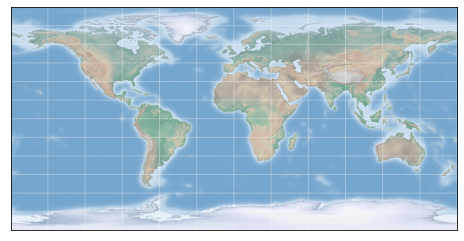

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

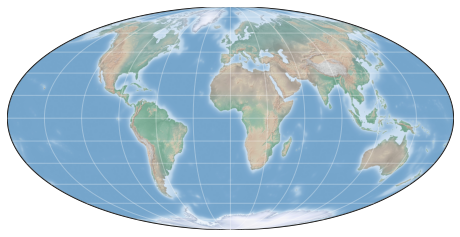

In [15]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

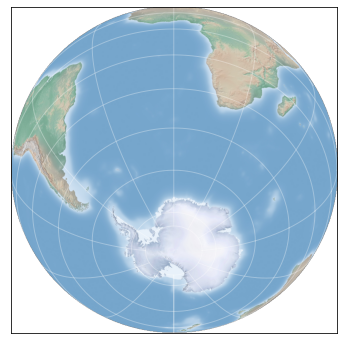

In [20]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='ortho', resolution=None, lat_0=-60, lon_0=0, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

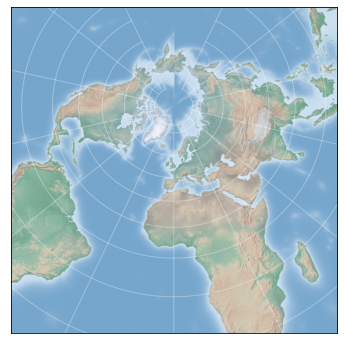

In [29]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='lcc', resolution=None, lon_0=0, lat_0=50, lat_1=0, lat_2=89, width=1.6E7, height=1.6E7)
draw_map(m)

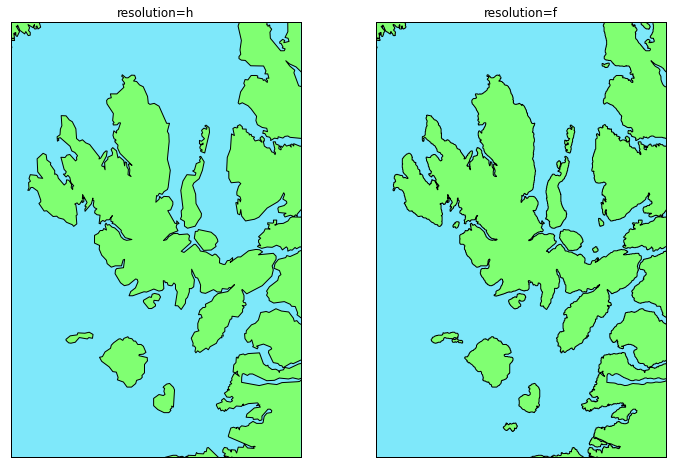

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['h', 'f']):
  m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, width=80000, height=120000, resolution=res, ax=ax[i])
  m.fillcontinents(color='#80FF72', lake_color='#7EE8FA')
  m.drawmapboundary(fill_color="#7EE8FA")
  m.drawcoastlines()
  ax[i].set_title("resolution={0}".format(res))

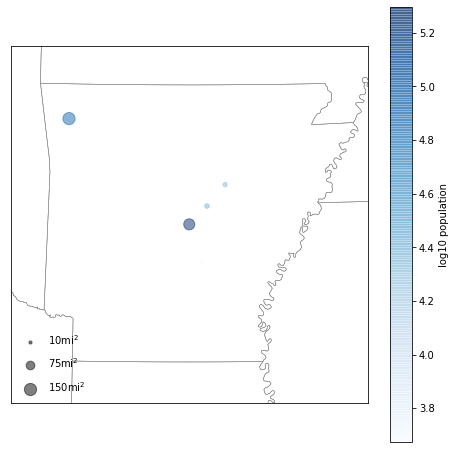

In [20]:
# Data
lat = [35.2438, 34.9749, 34.7445, 36.0619, 34.2715]
lon = [-91.7364, -92.0163, -92.2880, -94.1605, -92.0894]
pop = [23673, 26376, 198067, 86622, 4726]
size = [18.41, 20.78, 123, 150.1, 7.15]
cities = ['Searcy', 'Cabot', 'Little Rock', 'Fayetteville', 'White Hall']

# Create figure and draw map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=lat[2], lon_0=lon[2], width=500000, height=500000)
# m.shadedrelief()
# m.drawcountries()
m.drawstates(color='gray')

m.scatter(lon, lat, latlon=True, c=np.log10(pop), s=size, alpha=0.5, cmap='Blues')
plt.colorbar(label='log10 population')

for a in [10, 75, 150]:
  plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a)+'mi$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

In [25]:
# !curl -O https://data.giss.nasa.gov/pub/gistemp/gistemp250.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    10  100    10    0     0     30      0 --:--:-- --:--:-- --:--:--    30


In [26]:

# from netCDF4 import Dataset
# from netCDF4 import date2index
# from datetime import datetime

# data = Dataset('gistemp250.nc')

# timeindex = date2index(datetime(2000, 1, 1), data.variables['time'])

# lat = data.variables['lat'][:]
# lon = data.variables['lon'][:]
# lon, lat = np.meshgrid(lon, lat)

# print(data.variables['time'])

OSError: ignored